## Melt fraction
The conductivity of melt being of the orders of ~10 S/m enhances the bulk conductivity drastically. We consider the model suggested by Pommier and Garnero et al., 2014 to determine the conductivity of the melt fraction. For the fertile and infertile melt, it should be taken into account that the estimates of conductivity are only valid when X<10 % vol. fraction.

In [2]:
import numpy as np;
import matplotlib.pyplot as maps;

In [22]:
def melt_MM3(X, P= 1):
    """
    X= melt fraction
    P= pressure in Gpa
    Outputs the conductivity of fertile melt
    """
    # fertile
    C_melt= 205.36*X*X -95.41*X+ 19.717;
    if P==2:
        C_melt= C_melt/(10**0.2);
    return C_melt;

def melt_DMM1(X, P= 1):
    """
    X= melt fraction
    P= pressure in Gpa
    Outputs the conductivity of depleted melt (DMM1)
    """
    # depleted
    C_melt= -5807.1*X**3+ 1495.2*X**2- 105.29*X+ 10.045;
    if P==2:
        C_melt= C_melt/(10**0.2);
    return C_melt;

def melt_T1(X, P= 1):
    """
    X= melt fraction
    P= pressure in Gpa
    Outputs the conductivity of fertile melt (T1)
    """
    # depleted
    C_melt= -2496.1*X**3+ 1320.1*X**2- 231.76*X+ 21.449;
    if P==2:
        C_melt= C_melt/(10**0.2);
    return C_melt;

In [23]:
def melt_basaltic(T, P= 1):
    """
    X= melt fraction
    P= pressure in Gpa
    Outputs the conductivity of basaltic melt
    """
    R= 8.314 # J/mol/K
    C_melt= 2.321* 10**5* np.exp(-1.40* 10**5/R/T);
    if P==2:
        C_melt= C_melt/(10**0.2);
    return C_melt;

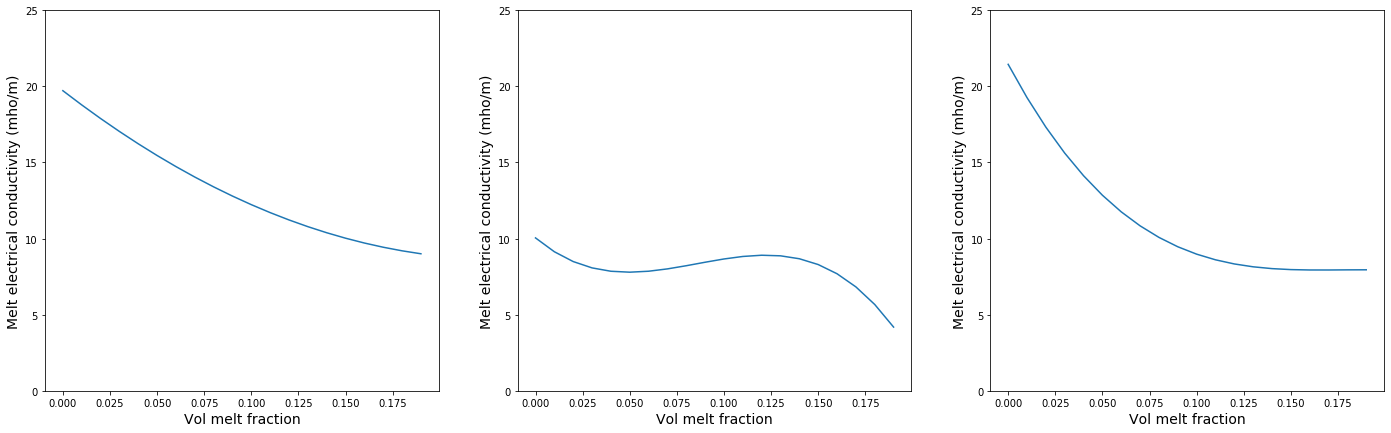

In [27]:
fig, ax= maps.subplots(1, 3, figsize= (24, 7))

ax1, ax2, ax3= ax;
X= np.arange(0,0.2,0.01);
ax1.plot(X, melt_MM3(X));
ax1.set_xlabel("Vol melt fraction", fontsize= 14);
ax1.set_ylabel("Melt electrical conductivity (mho/m)", fontsize= 14);
ax1.set_ylim([0, 25])

ax2.plot(X, melt_DMM1(X));
ax2.set_xlabel("Vol melt fraction", fontsize= 14);
ax2.set_ylabel("Melt electrical conductivity (mho/m)", fontsize= 14);
ax2.set_ylim([0, 25])

ax3.plot(X, melt_T1(X));
ax3.set_xlabel("Vol melt fraction", fontsize= 14);
ax3.set_ylabel("Melt electrical conductivity (mho/m)", fontsize= 14);
ax3.set_ylim([0, 25]);

Conductivity of melts and even the partial melt fraction depends on a number of factors. Therefore, the results one obtain may be highly dependent on the laboratory study one undertook. The conductivity of melts generally vary in the range of 1- 10 mho/m and could even be taken constant at (say) 10 mho/m and from the different models suggested by Pommier and Garnero et al., 2014, determine the bulk conductivity because of different melt fractions. We shall consider the HS bounds estimation from the same paper.

In [26]:
def bulk_cond_melt(X, melt_cond, solid_cond):
    """
    X= melt fraction
    melt_cond= conductivity of the melt
    solid_cond= conductivity of the solid melt assemblage
    """
    HS_u= melt_cond+ (1- X)/(1/(solid_cond+ melt_cond)+
                            X/(3*melt_cond));
    HS_l= solid_cond+ (1- X)/(1/(solid_cond+ melt_cond)+
                            (1- X)/(3*melt_cond));
    
    HS= {"HS_upper": HS_u, "HS_lower": HS_l};
    return HS;
